Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 1.7341, Accuracy: 34.86%
Epoch [2/10], Loss: 1.3216, Accuracy: 52.35%
Epoch [3/10], Loss: 1.1534, Accuracy: 59.43%
Epoch [4/10], Loss: 1.0564, Accuracy: 63.28%
Epoch [5/10], Loss: 0.9868, Accuracy: 65.69%
Epoch [6/10], Loss: 0.9430, Accuracy: 67.56%
Epoch [7/10], Loss: 0.9080, Accuracy: 68.95%
Epoch [8/10], Loss: 0.8830, Accuracy: 69.93%
Epoch [9/10], Loss: 0.8559, Accuracy: 70.52%
Epoch [10/10], Loss: 0.8360, Accuracy: 71.52%
Test Accuracy: 77.12%


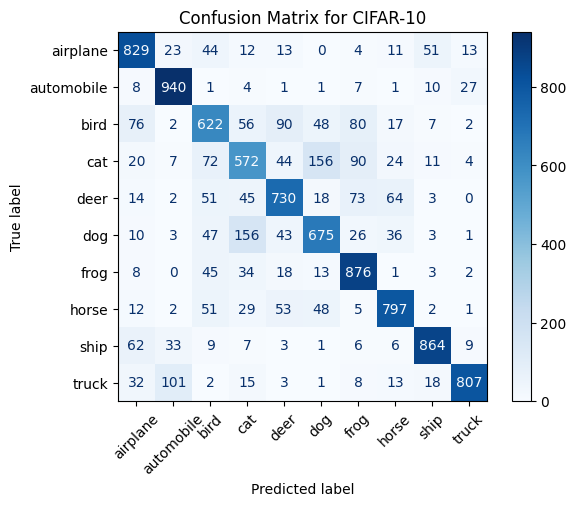

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 1.7824, Accuracy: 33.02%
Epoch [2/10], Loss: 1.3951, Accuracy: 49.62%


In [5]:
# Importing required libraries for model development, training, evaluation, and visualization.
import torch  # PyTorch library for deep learning and neural network operations.
import torch.nn as nn  # Module to define and work with neural network layers.
import torch.nn.functional as F  # Functional API for non-layer-specific operations (e.g., activations).
import torch.optim as optim  # Optimization algorithms like Adam, SGD, etc.
from torchvision import datasets, transforms  # Utilities for working with image datasets and preprocessing.
from torch.utils.data import DataLoader  # DataLoader for batching and shuffling datasets efficiently.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Evaluation metrics and visualization tools.
import matplotlib.pyplot as plt  # Library for generating plots and visualizations.

# Device configuration for computation, prioritizing GPU if available for faster training.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transformations for training data: Augment and normalize the images for better generalization.
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally to increase data diversity.
    transforms.RandomCrop(32, padding=4),  # Crop images with added padding for more robust learning.
    transforms.ToTensor(),  # Convert images to PyTorch tensors.
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to the range [-1, 1].
])

# Transformations for testing data: Normalize the images without augmentation.
transform_test = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors.
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to the range [-1, 1].
])

# Downloading and loading the CIFAR-10 training dataset, applying the defined transformations.
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

# Downloading and loading the CIFAR-10 testing dataset, applying the defined transformations.
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Creating a DataLoader for the training dataset for efficient data batching and shuffling.
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)

# Creating a DataLoader for the testing dataset for efficient data batching (no shuffling required).
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)

# Defining the Enhanced Convolutional Neural Network (CNN) model architecture.
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # First convolutional layer.
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer.
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Third convolutional layer.
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling layer to reduce spatial dimensions.
        self.fc1 = nn.Linear(128 * 8 * 8, 256)  # Fully connected layer with 256 units.
        self.fc2 = nn.Linear(256, 128)  # Fully connected layer with 128 units.
        self.fc3 = nn.Linear(128, 10)  # Output layer for 10 classes.
        self.dropout = nn.Dropout(0.5)  # Dropout to reduce overfitting.

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU to the first convolutional layer.
        x = self.pool(F.relu(self.conv2(x)))  # Apply ReLU and pooling to the second convolutional layer.
        x = self.pool(F.relu(self.conv3(x)))  # Apply ReLU and pooling to the third convolutional layer.
        x = x.view(-1, 128 * 8 * 8)  # Flatten the output for fully connected layers.
        x = self.dropout(F.relu(self.fc1(x)))  # Apply ReLU and dropout to the first fully connected layer.
        x = self.dropout(F.relu(self.fc2(x)))  # Apply ReLU and dropout to the second fully connected layer.
        x = self.fc3(x)  # Compute logits for class prediction.
        return x

# Defining the LeNet-5 architecture (simpler than EnhancedCNN, adapted for CIFAR-10).
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=2)  # First convolutional layer.
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)  # Second convolutional layer.
        self.fc1 = nn.Linear(16 * 8 * 8, 120)  # First fully connected layer.
        self.fc2 = nn.Linear(120, 84)  # Second fully connected layer.
        self.fc3 = nn.Linear(84, num_classes)  # Output layer for class predictions.

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU to the first convolutional layer.
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # Pooling to reduce spatial dimensions.
        x = F.relu(self.conv2(x))  # Apply ReLU to the second convolutional layer.
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # Pooling to reduce spatial dimensions.
        x = x.view(-1, 16 * 8 * 8)  # Flatten the output for fully connected layers.
        x = F.relu(self.fc1(x))  # Apply ReLU to the first fully connected layer.
        x = F.relu(self.fc2(x))  # Apply ReLU to the second fully connected layer.
        x = self.fc3(x)  # Compute logits for class prediction.
        return x

# Initializing the model (EnhancedCNN by default) and transferring it to the device.
model = EnhancedCNN().to(device)  # Replace with `LeNet5()` if using the LeNet-5 architecture.

# Defining the loss function for classification tasks.
criterion = nn.CrossEntropyLoss()

# Configuring the optimizer (Adam) for learning rate updates.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Setting up a learning rate scheduler to decay the learning rate every 10 epochs.
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Training Loop: Train the model over multiple epochs.
epochs = 10  # Number of epochs to train the model.
train_losses = []  # List to store training losses.
test_accuracies = []  # List to store testing accuracies.

for epoch in range(epochs):
    model.train()  # Set the model to training mode.
    running_loss = 0.0  # Initialize the cumulative loss for the epoch.
    correct = 0  # Count of correct predictions.
    total = 0  # Total number of samples.

    for inputs, labels in train_loader:  # Iterate over batches of data.
        inputs, labels = inputs.to(device), labels.to(device)  # Transfer data to device.

        # Forward pass: Compute model predictions.
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Compute the loss.

        # Backward pass and optimization step.
        optimizer.zero_grad()  # Reset gradients.
        loss.backward()  # Compute gradients.
        optimizer.step()  # Update model parameters.

        # Update statistics.
        running_loss += loss.item()
        _, predicted = outputs.max(1)  # Get predicted class indices.
        total += labels.size(0)  # Update total sample count.
        correct += predicted.eq(labels).sum().item()  # Count correct predictions.

    train_acc = 100. * correct / total  # Compute training accuracy.
    train_losses.append(running_loss / len(train_loader))  # Store average loss for the epoch.
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {train_acc:.2f}%")

    scheduler.step()  # Update the learning rate.

# Testing Loop: Evaluate the model on the testing dataset.
model.eval()  # Set the model to evaluation mode.
correct = 0  # Count of correct predictions.
total = 0  # Total number of samples.
all_preds = []  # List to store all predictions.
all_labels = []  # List to store all true labels.

with torch.no_grad():  # Disable gradient computation for evaluation.
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Transfer data to device.
        outputs = model(inputs)  # Compute model predictions.
        _, predicted = outputs.max(1)  # Get predicted class indices.
        total += labels.size(0)  # Update total sample count.
        correct += predicted.eq(labels).sum().item()  # Count correct predictions.
        all_preds.extend(predicted.cpu().numpy())  # Store predictions.
        all_labels.extend(labels.cpu().numpy())  # Store true labels.

test_acc = 100. * correct / total  # Compute testing accuracy.
test_accuracies.append(test_acc)  # Store testing accuracy.
print(f"Test Accuracy: {test_acc:.2f}%")

# Confusion Matrix: Visualize the classification performance.
cm = confusion_matrix(all_labels, all_preds)  # Compute confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)  # Create display object.
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)  # Plot confusion matrix.
plt.title("Confusion Matrix for CIFAR-10")  # Add title to the plot.
plt.show()  # Display the plot.



In [3]:

def compute_classification_report(actual_labels, predicted_labels, num_classes=10):
    # Initialize confusion matrix with zeros
    confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]

    # Populate the confusion matrix by comparing actual and predicted labels
    for i in range(len(actual_labels)):
        true_label = int(actual_labels[i])  # Get the true label for the current instance
        pred_label = int(predicted_labels[i])  # Get the predicted label for the current instance
        confusion_matrix[true_label][pred_label] += 1  # Increment the corresponding cell in the matrix

    # Initialize lists to store precision, recall, and F1-score for each class
    precision = [0] * num_classes
    recall = [0] * num_classes
    f1_score = [0] * num_classes

    # Calculate precision, recall, and F1-score for each class
    for cls in range(num_classes):
        tp = confusion_matrix[cls][cls]  # True Positives for the current class
        fp = sum(confusion_matrix[row][cls] for row in range(num_classes)) - tp  # False Positives for the current class
        fn = sum(confusion_matrix[cls]) - tp  # False Negatives for the current class

        # Precision: True Positives / (True Positives + False Positives)
        precision[cls] = tp / (tp + fp) if (tp + fp) > 0 else 0.0

        # Recall: True Positives / (True Positives + False Negatives)
        recall[cls] = tp / (tp + fn) if (tp + fn) > 0 else 0.0

        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        f1_score[cls] = (
            2 * precision[cls] * recall[cls] / (precision[cls] + recall[cls])
            if (precision[cls] + recall[cls]) > 0
            else 0.0
        )

    # Calculate macro-averages for precision, recall, and F1-score
    macro_precision = sum(precision) / num_classes  # Average precision across all classes
    macro_recall = sum(recall) / num_classes  # Average recall across all classes
    macro_f1 = sum(f1_score) / num_classes  # Average F1-score across all classes

    # Display the classification report with class-wise metrics
    print("Class\tPrecision\tRecall\t\tF1-Score")
    for cls in range(num_classes):
        # Print precision, recall, and F1-score for each class formatted to 2 decimal places
        print(f"{cls}\t{precision[cls]:.2f}\t\t{recall[cls]:.2f}\t\t{f1_score[cls]:.2f}")

    # Print macro-averaged metrics for overall model performance
    print("\nMacro-Average Metrics:")
    print(f"Precision: {macro_precision:.2f}")
    print(f"Recall: {macro_recall:.2f}")
    print(f"F1-Score: {macro_f1:.2f}")

    # Return the calculated metrics for further use or analysis
    return precision, recall, f1_score, macro_precision, macro_recall, macro_f1


# Example usage of the function with sample data
true_labels = [0, 1, 2, 1, 0, 2, 1, 2, 0, 2]  # Replace with your actual labels
predictions = [0, 1, 1, 1, 0, 2, 0, 2, 2, 2]  # Replace with your predicted labels

# Call the function and store the returned metrics
precision, recall, f1_score, macro_precision, macro_recall, macro_f1 = compute_classification_report(
    true_labels, predictions, num_classes=10
)


Class	Precision	Recall		F1-Score
0	0.67		0.67		0.67
1	0.67		0.67		0.67
2	0.75		0.75		0.75
3	0.00		0.00		0.00
4	0.00		0.00		0.00
5	0.00		0.00		0.00
6	0.00		0.00		0.00
7	0.00		0.00		0.00
8	0.00		0.00		0.00
9	0.00		0.00		0.00

Macro-Average Metrics:
Precision: 0.21
Recall: 0.21
F1-Score: 0.21
